In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits, ascii
import os
import numpy as np
#import requests
import pickle
from astropy.time import Time
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


/home/nhao/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [7]:
os.listdir()

['Spectra_comparision.ipynb',
 'PCA.ipynb',
 '.ipynb_checkpoints',
 '.cache',
 'Correlating&Labeling-Noise-Reduction.ipynb',
 'flares1_extract.csv',
 'my_plot3.png',
 'Correlating&Labeling.ipynb',
 'ML 3 labels.ipynb',
 'flares',
 'RBF_ascores.png',
 'flares_Data_cleaning.ipynb',
 'my_plot6.png',
 'my_plot5.png',
 '.config',
 'Correlation_HighNoiseDataRemoved.ipynb',
 '.profile',
 'SVM_nonlinear_3labels.ipynb',
 'my_plot4.png',
 '.bash_logout',
 '.bash_history',
 '.bashrc',
 'Undersampling+SVC.ipynb',
 'RBF + poly Accuracy Scores.png',
 'Untar-ed_spectra_2015-2018',
 'Anaconda3-2020.07-Linux-x86_64.sh',
 'fluxes_7labels_JD.csv',
 '.astropy',
 '.conda',
 'my_ploti.png',
 'Copy of Interactive_PCA.ipynb',
 'anaconda3',
 '.local',
 'gamma.png',
 'my_plot8.png',
 'Data_download2.ipynb',
 'counts.png',
 'my_plot1.png',
 'fluxes_pca_1000.pic',
 'my_plot9.png',
 'fluxes_BJD_1.pic',
 'rbf_grid.png',
 'solar_spectra',
 'my_plot.png',
 '.python_history',
 '.ipython',
 'my_plot2.png',
 'flux_3labe

In [8]:
# use pandas or astropy.io to import flare database file created

flares_data = pd.read_csv("/home/nhao/flares/flares_data_new.csv")

flares_data
# NOTE: here time JD is the start time in JD


,Flare,Start,time,Peak,End,Dur,Peak c/s,Total,Energy,X Pos,Y Pos,Radial,AR,Flags,time JD,Peak JD,End JD
0,15072801,2015-07-28,00:37:32,00:41:42,00:45:32,480,240,279476,6-12,-331,-294,443,2389,"A0, P1, PE, Q2, SE",2.457232e+06,2.457232e+06,2.457232e+06
1,15072808,2015-07-28,03:05:00,03:05:30,03:05:52,52,31,8004,6-12,254,-372,451,2390,"A0, DF, P1, PE, Q2",2.457232e+06,2.457232e+06,2.457232e+06
2,15072803,2015-07-28,03:14:12,03:17:06,03:22:12,480,40,77107,6-12,-317,-275,420,2389,"A0, DF, P1, PE, Q2",2.457232e+06,2.457232e+06,2.457232e+06
3,15072802,2015-07-28,08:00:04,08:01:34,08:05:08,304,51,61246,6-12,-264,-281,386,2389,"A0, DF, P1, PE, Q2",2.457232e+06,2.457232e+06,2.457232e+06
4,15072804,2015-07-28,12:32:40,12:34:10,12:37:40,300,67,71406,6-12,314,-314,444,2390,"A0, DR, P1, PE, Q2",2.457232e+06,2.457232e+06,2.457232e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6809,18021101,2018-02-11,01:07:04,01:08:30,01:10:08,184,312,33349,12-25,11,-86,87,2699,"A0, DF, DR, P1, PE, Q3",2.458161e+06,2.458161e+06,2.458161e+06
6810,18021203,2018-02-12,06:58:00,06:59:10,07:01:04,184,181,19930,6-12,290,11,290,2699,"A0, DF, DR, P1, PE, Q3",2.458162e+06,2.458162e+06,2.458162e+06
6811,18022601,2018-02-26,15:49:40,15:51:14,15:53:56,256,155,16984,6-12,-15,199,199,0,"A0, DF, P1, PE, Q2",2.458176e+06,2.458176e+06,2.458176e+06
6812,18030301,2018-03-03,04:04:24,04:06:10,04:09:52,328,116,19161,6-12,924,129,933,2700,"A0, P1, PE, Q1",2.458181e+06,2.458181e+06,2.458181e+06


In [12]:
# filter out flares with certain flags

# Remove rows where the column'Flags' contains the string ''
string_to_remove = 'NS'
filtered_flares = flares_data[~flares_data['Flags'].str.contains(string_to_remove)]

filtered_flares

,Flare,Start,time,Peak,End,Dur,Peak c/s,Total,Energy,X Pos,Y Pos,Radial,AR,Flags,time JD,Peak JD,End JD
0,15072801,2015-07-28,00:37:32,00:41:42,00:45:32,480,240,279476,6-12,-331,-294,443,2389,"A0, P1, PE, Q2, SE",2.457232e+06,2.457232e+06,2.457232e+06
1,15072808,2015-07-28,03:05:00,03:05:30,03:05:52,52,31,8004,6-12,254,-372,451,2390,"A0, DF, P1, PE, Q2",2.457232e+06,2.457232e+06,2.457232e+06
2,15072803,2015-07-28,03:14:12,03:17:06,03:22:12,480,40,77107,6-12,-317,-275,420,2389,"A0, DF, P1, PE, Q2",2.457232e+06,2.457232e+06,2.457232e+06
3,15072802,2015-07-28,08:00:04,08:01:34,08:05:08,304,51,61246,6-12,-264,-281,386,2389,"A0, DF, P1, PE, Q2",2.457232e+06,2.457232e+06,2.457232e+06
4,15072804,2015-07-28,12:32:40,12:34:10,12:37:40,300,67,71406,6-12,314,-314,444,2390,"A0, DR, P1, PE, Q2",2.457232e+06,2.457232e+06,2.457232e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6809,18021101,2018-02-11,01:07:04,01:08:30,01:10:08,184,312,33349,12-25,11,-86,87,2699,"A0, DF, DR, P1, PE, Q3",2.458161e+06,2.458161e+06,2.458161e+06
6810,18021203,2018-02-12,06:58:00,06:59:10,07:01:04,184,181,19930,6-12,290,11,290,2699,"A0, DF, DR, P1, PE, Q3",2.458162e+06,2.458162e+06,2.458162e+06
6811,18022601,2018-02-26,15:49:40,15:51:14,15:53:56,256,155,16984,6-12,-15,199,199,0,"A0, DF, P1, PE, Q2",2.458176e+06,2.458176e+06,2.458176e+06
6812,18030301,2018-03-03,04:04:24,04:06:10,04:09:52,328,116,19161,6-12,924,129,933,2700,"A0, P1, PE, Q1",2.458181e+06,2.458181e+06,2.458181e+06


it seems like there are no observations that have the flags NS, now try Q11

In [14]:


# Remove rows where the column'Flags' contains the string ''
string_to_remove = 'Q11'
filtered_flares = flares_data[~flares_data['Flags'].str.contains(string_to_remove)]

filtered_flares

,Flare,Start,time,Peak,End,Dur,Peak c/s,Total,Energy,X Pos,Y Pos,Radial,AR,Flags,time JD,Peak JD,End JD
0,15072801,2015-07-28,00:37:32,00:41:42,00:45:32,480,240,279476,6-12,-331,-294,443,2389,"A0, P1, PE, Q2, SE",2.457232e+06,2.457232e+06,2.457232e+06
1,15072808,2015-07-28,03:05:00,03:05:30,03:05:52,52,31,8004,6-12,254,-372,451,2390,"A0, DF, P1, PE, Q2",2.457232e+06,2.457232e+06,2.457232e+06
2,15072803,2015-07-28,03:14:12,03:17:06,03:22:12,480,40,77107,6-12,-317,-275,420,2389,"A0, DF, P1, PE, Q2",2.457232e+06,2.457232e+06,2.457232e+06
3,15072802,2015-07-28,08:00:04,08:01:34,08:05:08,304,51,61246,6-12,-264,-281,386,2389,"A0, DF, P1, PE, Q2",2.457232e+06,2.457232e+06,2.457232e+06
4,15072804,2015-07-28,12:32:40,12:34:10,12:37:40,300,67,71406,6-12,314,-314,444,2390,"A0, DR, P1, PE, Q2",2.457232e+06,2.457232e+06,2.457232e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6809,18021101,2018-02-11,01:07:04,01:08:30,01:10:08,184,312,33349,12-25,11,-86,87,2699,"A0, DF, DR, P1, PE, Q3",2.458161e+06,2.458161e+06,2.458161e+06
6810,18021203,2018-02-12,06:58:00,06:59:10,07:01:04,184,181,19930,6-12,290,11,290,2699,"A0, DF, DR, P1, PE, Q3",2.458162e+06,2.458162e+06,2.458162e+06
6811,18022601,2018-02-26,15:49:40,15:51:14,15:53:56,256,155,16984,6-12,-15,199,199,0,"A0, DF, P1, PE, Q2",2.458176e+06,2.458176e+06,2.458176e+06
6812,18030301,2018-03-03,04:04:24,04:06:10,04:09:52,328,116,19161,6-12,924,129,933,2700,"A0, P1, PE, Q1",2.458181e+06,2.458181e+06,2.458181e+06


In [4]:
# Load solar spectra data
# read https://ianlondon.github.io/blog/pickling-basics/ for hints to importing pickle file
with open('/home/nhao/fluxes_pca_1000.pic', 'rb') as f:
    spec_data = pickle.load(f)

In [5]:
print(spec_data)
# spec_data is a tuple

(array([[-7.72269313e+01, -1.74557996e+01,  1.88932415e+01, ...,
         6.82843491e-02,  3.71940737e-01,  9.02037177e-01],
       [-1.52609354e+02, -3.75557079e+01, -4.67123258e+01, ...,
        -1.91165134e+00,  5.10325611e-03, -3.26359281e-01],
       [-1.37820947e+02, -7.45654648e+00, -3.68488512e+01, ...,
        -1.35224682e+00,  5.87637281e-01,  8.10432948e-01],
       ...,
       [-7.29649565e+01, -1.36966347e+01,  1.81595530e+01, ...,
         5.85996245e-01, -1.46985216e+00, -3.31504816e-01],
       [-3.72134921e+01,  2.72094533e+00,  2.83998107e+01, ...,
         3.07842973e-01, -7.45496653e-01, -6.63347244e-01],
       [-7.13935341e+01, -2.17404147e+01,  1.32891988e+01, ...,
         9.93791980e-01, -4.48699330e-01, -1.52519972e+00]]), array([2457235.86722663, 2457235.08831722, 2457234.9530733 , ...,
       2457519.95603388, 2457519.89587695, 2457519.95978996]), array([6400.01659489, 6400.03410052, 6400.05160619, ..., 6699.94614955,
       6699.96447554, 6699.98280159]), a

In [7]:
len(spec_data)
# each item in the tuple spec_data corresponds to fluxes_pca_n1000, BJD_times, wls, start_times, end_times, exp_times

6

In [6]:
# spectroscopy
fluxes_pca_n1000 = pd.DataFrame(spec_data[0]) #fluxes_pca_n1000
fluxes_pca_n1000

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-77.226931,-17.455800,18.893241,15.820182,-9.982734,15.043798,4.179589,-17.948554,-2.606717,-1.108273,...,0.119093,-0.162462,0.028272,-1.012767,0.186138,0.166001,1.284391,0.068284,0.371941,0.902037
1,-152.609354,-37.555708,-46.712326,11.335045,0.584405,8.266733,-0.834839,1.118031,2.682780,-2.324749,...,-0.126210,-0.341555,-0.200902,0.648628,-0.158028,-0.274293,1.317403,-1.911651,0.005103,-0.326359
2,-137.820947,-7.456546,-36.848851,2.369756,-3.514909,14.162960,4.620202,-1.609684,-0.721766,-5.967783,...,-0.570119,0.172088,0.455582,1.034672,-0.596952,0.462513,-0.773176,-1.352247,0.587637,0.810433
3,-159.809543,-34.025970,-32.196320,1.168193,-1.194769,11.980240,3.178410,-2.911753,-0.323603,-6.322462,...,-0.222962,0.125882,-0.970405,-0.920185,0.221509,0.093836,0.542105,-1.106048,0.877086,0.689458
4,-150.763019,-35.511307,-47.121941,10.237884,1.104875,7.392145,-0.367977,1.931578,3.407632,-2.523923,...,0.432102,-0.788151,1.020580,0.191762,-0.744943,-0.993822,0.657094,-0.539081,-0.928584,-1.171663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28410,66.250195,50.639520,81.550675,30.381838,2.992594,13.370503,6.323793,-6.035832,11.768254,3.098902,...,0.092475,-1.457763,-1.240908,0.479000,-1.048366,1.941936,-0.988622,-1.026125,0.372124,1.261229
28411,-38.593233,14.109218,32.758031,1.911352,4.727023,3.886029,-1.979894,21.747084,6.563772,-4.781537,...,-0.484974,0.033586,0.326658,1.685865,0.979851,1.316266,-0.418129,0.786073,-1.645505,-0.586321
28412,-72.964957,-13.696635,18.159553,-1.407163,4.126969,3.115778,-11.960450,26.443290,6.974761,-3.729468,...,-0.611142,1.576519,2.962566,0.880726,-0.709951,-0.070151,-0.623401,0.585996,-1.469852,-0.331505
28413,-37.213492,2.720945,28.399811,8.287974,2.157047,1.111266,-3.276166,23.269013,5.202598,-4.129765,...,-0.107823,0.984649,0.618731,0.545907,0.446041,-0.480131,-0.120338,0.307843,-0.745497,-0.663347


In [7]:
fluxes_pca_n1000.shape

(28415, 1000)

In [8]:
exp_times = pd.DataFrame(spec_data[5])
exp_times

,0
0,300.0
1,300.0
2,300.0
3,300.0
4,300.0
...,...
28410,300.0
28411,300.0
28412,300.0
28413,300.0


In [9]:
# divide the time value by 86400

exp_times = exp_times.copy()/86400

exp_times


,0
0,0.003472
1,0.003472
2,0.003472
3,0.003472
4,0.003472
...,...
28410,0.003472
28411,0.003472
28412,0.003472
28413,0.003472


In [10]:
# calculate start JD times

# extract BJD times
BJD_times = pd.DataFrame(spec_data[1])

# add exp_time to BJD time to get end time
end_times = BJD_times + exp_times

# Subtract exp_time from BJD time to get start time
start_times = BJD_times - exp_times

start_times

,0
0,2.457236e+06
1,2.457235e+06
2,2.457235e+06
3,2.457235e+06
4,2.457235e+06
...,...
28410,2.457510e+06
28411,2.457520e+06
28412,2.457520e+06
28413,2.457520e+06


# Correlate data with solar flares


In [11]:
# go through each date of the solar spectra

  # combine fluxes_n1000, BJD_times, start_times, end_times into 1 data frame/add new columns to flu

fluxes = fluxes_pca_n1000.copy()
fluxes['BJD times'] = BJD_times
fluxes['Start times'] = start_times
fluxes['End times'] = end_times

fluxes


,0,1,2,3,4,5,6,7,8,9,...,993,994,995,996,997,998,999,BJD times,Start times,End times
0,-77.226931,-17.455800,18.893241,15.820182,-9.982734,15.043798,4.179589,-17.948554,-2.606717,-1.108273,...,-1.012767,0.186138,0.166001,1.284391,0.068284,0.371941,0.902037,2.457236e+06,2.457236e+06,2.457236e+06
1,-152.609354,-37.555708,-46.712326,11.335045,0.584405,8.266733,-0.834839,1.118031,2.682780,-2.324749,...,0.648628,-0.158028,-0.274293,1.317403,-1.911651,0.005103,-0.326359,2.457235e+06,2.457235e+06,2.457235e+06
2,-137.820947,-7.456546,-36.848851,2.369756,-3.514909,14.162960,4.620202,-1.609684,-0.721766,-5.967783,...,1.034672,-0.596952,0.462513,-0.773176,-1.352247,0.587637,0.810433,2.457235e+06,2.457235e+06,2.457235e+06
3,-159.809543,-34.025970,-32.196320,1.168193,-1.194769,11.980240,3.178410,-2.911753,-0.323603,-6.322462,...,-0.920185,0.221509,0.093836,0.542105,-1.106048,0.877086,0.689458,2.457235e+06,2.457235e+06,2.457235e+06
4,-150.763019,-35.511307,-47.121941,10.237884,1.104875,7.392145,-0.367977,1.931578,3.407632,-2.523923,...,0.191762,-0.744943,-0.993822,0.657094,-0.539081,-0.928584,-1.171663,2.457235e+06,2.457235e+06,2.457235e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28410,66.250195,50.639520,81.550675,30.381838,2.992594,13.370503,6.323793,-6.035832,11.768254,3.098902,...,0.479000,-1.048366,1.941936,-0.988622,-1.026125,0.372124,1.261229,2.457510e+06,2.457510e+06,2.457510e+06
28411,-38.593233,14.109218,32.758031,1.911352,4.727023,3.886029,-1.979894,21.747084,6.563772,-4.781537,...,1.685865,0.979851,1.316266,-0.418129,0.786073,-1.645505,-0.586321,2.457520e+06,2.457520e+06,2.457520e+06
28412,-72.964957,-13.696635,18.159553,-1.407163,4.126969,3.115778,-11.960450,26.443290,6.974761,-3.729468,...,0.880726,-0.709951,-0.070151,-0.623401,0.585996,-1.469852,-0.331505,2.457520e+06,2.457520e+06,2.457520e+06
28413,-37.213492,2.720945,28.399811,8.287974,2.157047,1.111266,-3.276166,23.269013,5.202598,-4.129765,...,0.545907,0.446041,-0.480131,-0.120338,0.307843,-0.745497,-0.663347,2.457520e+06,2.457520e+06,2.457520e+06


In [12]:
# convert start and end times to JD 

# each item in the tuple spec_data corresponds to fluxes_pca_n1000, BJD_times, wls, start_times, end_times, exp_times


# start time 
JD_start = spec_data[3].tolist()
t1 = Time(JD_start,format = 'iso', scale = 'utc')

Start_JD = pd.Series(t1.jd)
fluxes['JD start'] = Start_JD.values

# end time
JD_end = spec_data[4].tolist()
t2 = Time(JD_end,format = 'iso', scale = 'utc')

End_JD = pd.Series(t2.jd)
fluxes['JD end'] = End_JD.values

fluxes

,0,1,2,3,4,5,6,7,8,9,...,995,996,997,998,999,BJD times,Start times,End times,JD start,JD end
0,-77.226931,-17.455800,18.893241,15.820182,-9.982734,15.043798,4.179589,-17.948554,-2.606717,-1.108273,...,0.166001,1.284391,0.068284,0.371941,0.902037,2.457236e+06,2.457236e+06,2.457236e+06,2.457236e+06,2.457236e+06
1,-152.609354,-37.555708,-46.712326,11.335045,0.584405,8.266733,-0.834839,1.118031,2.682780,-2.324749,...,-0.274293,1.317403,-1.911651,0.005103,-0.326359,2.457235e+06,2.457235e+06,2.457235e+06,2.457235e+06,2.457235e+06
2,-137.820947,-7.456546,-36.848851,2.369756,-3.514909,14.162960,4.620202,-1.609684,-0.721766,-5.967783,...,0.462513,-0.773176,-1.352247,0.587637,0.810433,2.457235e+06,2.457235e+06,2.457235e+06,2.457235e+06,2.457235e+06
3,-159.809543,-34.025970,-32.196320,1.168193,-1.194769,11.980240,3.178410,-2.911753,-0.323603,-6.322462,...,0.093836,0.542105,-1.106048,0.877086,0.689458,2.457235e+06,2.457235e+06,2.457235e+06,2.457235e+06,2.457235e+06
4,-150.763019,-35.511307,-47.121941,10.237884,1.104875,7.392145,-0.367977,1.931578,3.407632,-2.523923,...,-0.993822,0.657094,-0.539081,-0.928584,-1.171663,2.457235e+06,2.457235e+06,2.457235e+06,2.457235e+06,2.457235e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28410,66.250195,50.639520,81.550675,30.381838,2.992594,13.370503,6.323793,-6.035832,11.768254,3.098902,...,1.941936,-0.988622,-1.026125,0.372124,1.261229,2.457510e+06,2.457510e+06,2.457510e+06,2.457510e+06,2.457510e+06
28411,-38.593233,14.109218,32.758031,1.911352,4.727023,3.886029,-1.979894,21.747084,6.563772,-4.781537,...,1.316266,-0.418129,0.786073,-1.645505,-0.586321,2.457520e+06,2.457520e+06,2.457520e+06,2.457520e+06,2.457520e+06
28412,-72.964957,-13.696635,18.159553,-1.407163,4.126969,3.115778,-11.960450,26.443290,6.974761,-3.729468,...,-0.070151,-0.623401,0.585996,-1.469852,-0.331505,2.457520e+06,2.457520e+06,2.457520e+06,2.457520e+06,2.457520e+06
28413,-37.213492,2.720945,28.399811,8.287974,2.157047,1.111266,-3.276166,23.269013,5.202598,-4.129765,...,-0.480131,-0.120338,0.307843,-0.745497,-0.663347,2.457520e+06,2.457520e+06,2.457520e+06,2.457520e+06,2.457520e+06


In [13]:
# Using zip() and enumerate()
# NOTE: zip() allows you to loop over multiple iterables in parallel, enumerate() gives you back two loop variables count & value 
# of the item at the current iteration

# loop through the date of solar spectra first

# add an empty new column to dataframe fluxes
fluxes['Labels'] = ""

flare_start_times = flares_data['time JD']
flare_peak_times = flares_data['Peak JD']
flare_end_times = flares_data['End JD']
""
spectra_start_times = fluxes['JD start']
spectra_end_times = fluxes['JD end']


In [14]:
spec_data[3] # start times

# extract dates from start times 

dates = []

for time in spec_data[3]:
  ind = time.index(' ')
  dates.append(time[:ind])

print(dates)

['2015-08-01', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-08-01', '2015-08-01', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-08-01', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-08-01', '2015-08-01', '2015-07-31', '2015-07-31', '2015-08-01', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-08-01', '2015-07-31', '2015-08-01', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31', '2015

In [15]:
fluxes['dates'] = dates

fluxes

,0,1,2,3,4,5,6,7,8,9,...,997,998,999,BJD times,Start times,End times,JD start,JD end,Labels,dates
0,-77.226931,-17.455800,18.893241,15.820182,-9.982734,15.043798,4.179589,-17.948554,-2.606717,-1.108273,...,0.068284,0.371941,0.902037,2.457236e+06,2.457236e+06,2.457236e+06,2.457236e+06,2.457236e+06,,2015-08-01
1,-152.609354,-37.555708,-46.712326,11.335045,0.584405,8.266733,-0.834839,1.118031,2.682780,-2.324749,...,-1.911651,0.005103,-0.326359,2.457235e+06,2.457235e+06,2.457235e+06,2.457235e+06,2.457235e+06,,2015-07-31
2,-137.820947,-7.456546,-36.848851,2.369756,-3.514909,14.162960,4.620202,-1.609684,-0.721766,-5.967783,...,-1.352247,0.587637,0.810433,2.457235e+06,2.457235e+06,2.457235e+06,2.457235e+06,2.457235e+06,,2015-07-31
3,-159.809543,-34.025970,-32.196320,1.168193,-1.194769,11.980240,3.178410,-2.911753,-0.323603,-6.322462,...,-1.106048,0.877086,0.689458,2.457235e+06,2.457235e+06,2.457235e+06,2.457235e+06,2.457235e+06,,2015-07-31
4,-150.763019,-35.511307,-47.121941,10.237884,1.104875,7.392145,-0.367977,1.931578,3.407632,-2.523923,...,-0.539081,-0.928584,-1.171663,2.457235e+06,2.457235e+06,2.457235e+06,2.457235e+06,2.457235e+06,,2015-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28410,66.250195,50.639520,81.550675,30.381838,2.992594,13.370503,6.323793,-6.035832,11.768254,3.098902,...,-1.026125,0.372124,1.261229,2.457510e+06,2.457510e+06,2.457510e+06,2.457510e+06,2.457510e+06,,2016-05-01
28411,-38.593233,14.109218,32.758031,1.911352,4.727023,3.886029,-1.979894,21.747084,6.563772,-4.781537,...,0.786073,-1.645505,-0.586321,2.457520e+06,2.457520e+06,2.457520e+06,2.457520e+06,2.457520e+06,,2016-05-11
28412,-72.964957,-13.696635,18.159553,-1.407163,4.126969,3.115778,-11.960450,26.443290,6.974761,-3.729468,...,0.585996,-1.469852,-0.331505,2.457520e+06,2.457520e+06,2.457520e+06,2.457520e+06,2.457520e+06,,2016-05-11
28413,-37.213492,2.720945,28.399811,8.287974,2.157047,1.111266,-3.276166,23.269013,5.202598,-4.129765,...,0.307843,-0.745497,-0.663347,2.457520e+06,2.457520e+06,2.457520e+06,2.457520e+06,2.457520e+06,,2016-05-11


In [16]:
# make a copy of fluxes
fluxes_1 = fluxes.copy()

In [17]:
# check whether peak time of flare is between the start time and end time of the solar spectra observation

# label each spectrum based on the date...?

# Strong flares: general structure of loop
# ---> extract from flares_data all the dates that have strong solar flares 
# ---> check date of spectrum 
# --> find corresponding date in flares_data
# --> check whether peak time is within the range of observation time of spectrum
# --> assign labels to dates 1. Strong flare start 2. Strong flare peak 3. Strong flsre end

# Repeat the process with Weak flares

# No flares

#######################################################
# add an empty new column to dataframe fluxes
fluxes_1['Labels'] = ""
labels = fluxes_1['Labels']
Energy = flares_data['Energy']
obs_dates = fluxes_1['dates']
flare_dates = flares_data['Start']

labels_1 = labels.copy()

In [18]:
flares_data

,Flare,Start,time,Peak,End,Dur,Peak c/s,Total,Energy,X Pos,Y Pos,Radial,AR,Flags,time JD,Peak JD,End JD
0,15072801,2015-07-28,00:37:32,00:41:42,00:45:32,480,240,279476,6-12,-331,-294,443,2389,"A0, P1, PE, Q2, SE",2.457232e+06,2.457232e+06,2.457232e+06
1,15072808,2015-07-28,03:05:00,03:05:30,03:05:52,52,31,8004,6-12,254,-372,451,2390,"A0, DF, P1, PE, Q2",2.457232e+06,2.457232e+06,2.457232e+06
2,15072803,2015-07-28,03:14:12,03:17:06,03:22:12,480,40,77107,6-12,-317,-275,420,2389,"A0, DF, P1, PE, Q2",2.457232e+06,2.457232e+06,2.457232e+06
3,15072802,2015-07-28,08:00:04,08:01:34,08:05:08,304,51,61246,6-12,-264,-281,386,2389,"A0, DF, P1, PE, Q2",2.457232e+06,2.457232e+06,2.457232e+06
4,15072804,2015-07-28,12:32:40,12:34:10,12:37:40,300,67,71406,6-12,314,-314,444,2390,"A0, DR, P1, PE, Q2",2.457232e+06,2.457232e+06,2.457232e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6809,18021101,2018-02-11,01:07:04,01:08:30,01:10:08,184,312,33349,12-25,11,-86,87,2699,"A0, DF, DR, P1, PE, Q3",2.458161e+06,2.458161e+06,2.458161e+06
6810,18021203,2018-02-12,06:58:00,06:59:10,07:01:04,184,181,19930,6-12,290,11,290,2699,"A0, DF, DR, P1, PE, Q3",2.458162e+06,2.458162e+06,2.458162e+06
6811,18022601,2018-02-26,15:49:40,15:51:14,15:53:56,256,155,16984,6-12,-15,199,199,0,"A0, DF, P1, PE, Q2",2.458176e+06,2.458176e+06,2.458176e+06
6812,18030301,2018-03-03,04:04:24,04:06:10,04:09:52,328,116,19161,6-12,924,129,933,2700,"A0, P1, PE, Q1",2.458181e+06,2.458181e+06,2.458181e+06


In [20]:
# no flare
no_flares = flares_data.copy()

remove_indices_2 = []
for count, value in enumerate(Energy): # count gives row index
    if value != '3-6':
        remove_indices_2.append(count)

no_flares = no_flares.drop(remove_indices_2)

In [21]:
# labeling, no flare

for date in no_flares['Start']:
      # find row index of obs_start
    row_ind_2 = fluxes_1.index[fluxes_1['dates'] == date].tolist()
      # add label to the column labels at the correct row index
    labels_1[row_ind_2] = 'no flare'

fluxes_1.shape

(28415, 1007)

In [22]:
# make no flares the default option
# loop over each item in fluxes_1 and make all the labels 'no flares'

# for date in fluxes_1['Start times']:
#       # find row index of obs_start
#       row_ind_2 = fluxes_1.index[date].tolist()
#       # add label to the column labels at the correct row index
#       labels_1[row_ind_2] = 'no flare'

for ind in range(len(fluxes_1['JD start'])):
    labels_1[ind] = 'no flare'

In [23]:
# Weak flares
# extract from flares_data all the dates and peak times that have weak solar flares 
# make a new dataframe (remove rows that are not solar flares)

flares_data_weak = flares_data.copy()

remove_indices_1 = []
for count, value in enumerate(Energy): # count gives row index
    if value != '6-12':
        remove_indices_1.append(count)

flares_data_weak = flares_data_weak.drop(remove_indices_1)

In [24]:
flares_data_weak

,Flare,Start,time,Peak,End,Dur,Peak c/s,Total,Energy,X Pos,Y Pos,Radial,AR,Flags,time JD,Peak JD,End JD
0,15072801,2015-07-28,00:37:32,00:41:42,00:45:32,480,240,279476,6-12,-331,-294,443,2389,"A0, P1, PE, Q2, SE",2.457232e+06,2.457232e+06,2.457232e+06
1,15072808,2015-07-28,03:05:00,03:05:30,03:05:52,52,31,8004,6-12,254,-372,451,2390,"A0, DF, P1, PE, Q2",2.457232e+06,2.457232e+06,2.457232e+06
2,15072803,2015-07-28,03:14:12,03:17:06,03:22:12,480,40,77107,6-12,-317,-275,420,2389,"A0, DF, P1, PE, Q2",2.457232e+06,2.457232e+06,2.457232e+06
3,15072802,2015-07-28,08:00:04,08:01:34,08:05:08,304,51,61246,6-12,-264,-281,386,2389,"A0, DF, P1, PE, Q2",2.457232e+06,2.457232e+06,2.457232e+06
4,15072804,2015-07-28,12:32:40,12:34:10,12:37:40,300,67,71406,6-12,314,-314,444,2390,"A0, DR, P1, PE, Q2",2.457232e+06,2.457232e+06,2.457232e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6808,18021001,2018-02-10,13:03:48,13:06:50,13:07:04,196,256,21702,6-12,-115,-47,124,2699,"A0, DF, EE, P1, PE, Q3",2.458160e+06,2.458160e+06,2.458160e+06
6810,18021203,2018-02-12,06:58:00,06:59:10,07:01:04,184,181,19930,6-12,290,11,290,2699,"A0, DF, DR, P1, PE, Q3",2.458162e+06,2.458162e+06,2.458162e+06
6811,18022601,2018-02-26,15:49:40,15:51:14,15:53:56,256,155,16984,6-12,-15,199,199,0,"A0, DF, P1, PE, Q2",2.458176e+06,2.458176e+06,2.458176e+06
6812,18030301,2018-03-03,04:04:24,04:06:10,04:09:52,328,116,19161,6-12,924,129,933,2700,"A0, P1, PE, Q1",2.458181e+06,2.458181e+06,2.458181e+06


In [28]:
weak_flare_peak_times = flares_data_weak['Peak JD']
weak_flare_start_times = flares_data_weak['time JD']
weak_flare_end_times = flares_data_weak['End JD']

for obs_start, obs_end in zip(spectra_start_times, spectra_end_times):
    for flare_peak, flare_start, flare_end in zip(weak_flare_peak_times, weak_flare_start_times, weak_flare_end_times):
        if flare_peak >= obs_start and flare_peak <= obs_end: # peak time of flare is within start time and end time of observation/date range contains a peak
            # find row index of obs_start
            row_ind_1 = fluxes_1.index[fluxes_1['JD start'] == obs_start].tolist()
            # add label to the column labels at the correct row index
            labels_1[row_ind_1] = 'weak flare peak'
        elif flare_start >= obs_start and flare_start <= obs_end: # time range contains start of a flare
            row_ind_1 = fluxes_1.index[fluxes_1['JD start'] == obs_start].tolist()
      # add label to the column labels at the correct row index
            labels_1[row_ind_1] = 'weak flare start'
        elif flare_end >= obs_start and flare_end <= obs_end: # time range contain the end of a flare
      # find row index of obs_start
            row_ind_1 = fluxes_1.index[fluxes_1['JD start'] == obs_start].tolist()
      # add label to the column labels at the correct row index
            labels_1[row_ind_1] = 'weak flare end'

In [29]:
# extract from flares_data all the dates and peak times that have strong solar flares 
# make a new dataframe (remove rows that are not strong flares)

flares_data_strong = flares_data.copy()

remove_indices = []
for count, value in enumerate(Energy): # count gives row index
    if value == '3-6':
        remove_indices.append(count)
    elif value =='6-12':
        remove_indices.append(count)
    
flares_data_strong = flares_data_strong.drop(remove_indices)

In [30]:
strong_flare_peak_times = flares_data_strong['Peak JD']
strong_flare_start_times = flares_data_strong['time JD']
strong_flare_end_times = flares_data_strong['End JD']

for obs_start, obs_end in zip(spectra_start_times, spectra_end_times):
    for flare_peak, flare_start, flare_end in zip(strong_flare_peak_times, strong_flare_start_times, strong_flare_end_times):
        if flare_peak >= obs_start and flare_peak <= obs_end: # peak time of flare is within start time and end time of observation/date range contains a peak
            row_ind = fluxes_1.index[fluxes_1['JD start'] == obs_start].tolist()
      # add label to the column labels at the correct row index
            labels_1[row_ind] = 'strong flare peak'
        elif flare_start >= obs_start and flare_start <= obs_end: # time range contains start of a flare
      # find row index of obs_start
            row_ind = fluxes_1.index[fluxes_1['JD start'] == obs_start].tolist()
      # add label to the column labels at the correct row index
            labels_1[row_ind] = 'strong flare start'
        elif flare_end >= obs_start and flare_end <= obs_end: # time range contain the end of a flare
            row_ind = fluxes_1.index[fluxes_1['JD start'] == obs_start].tolist()
            labels_1[row_ind] = 'strong flare end'

fluxes_1['Labels'] = labels_1
labels_1

0                no flare
1                no flare
2                no flare
3                no flare
4                no flare
               ...       
28410            no flare
28411            no flare
28412    strong flare end
28413            no flare
28414            no flare
Name: Labels, Length: 28415, dtype: object

In [31]:
# check results (after converting time to JD)

fluxes_1['Labels'].value_counts()

no flare              26723
weak flare peak         604
weak flare end          322
weak flare start        299
strong flare peak       202
strong flare end        141
strong flare start      124
Name: Labels, dtype: int64

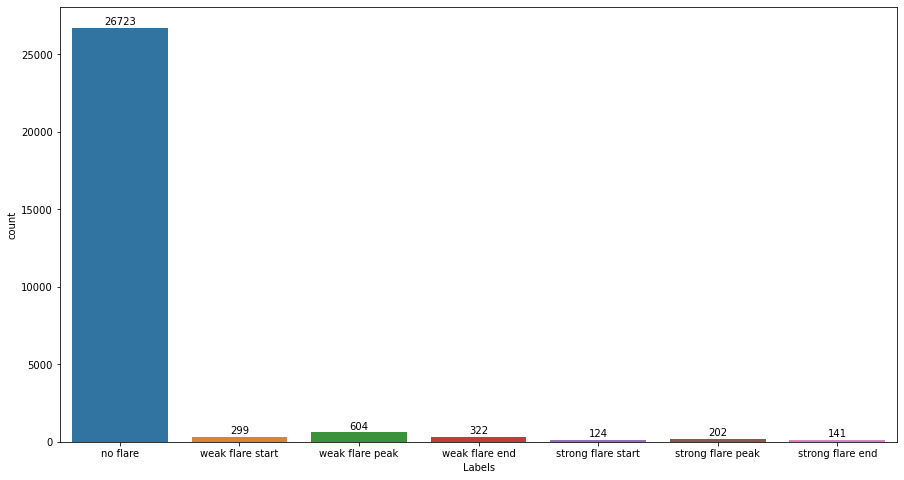

In [32]:
# bar plot

countplt, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x="Labels", data=fluxes_1, order = ('no flare', 'weak flare start', 'weak flare peak', 'weak flare end', 'strong flare start', 'strong flare peak', 'strong flare end'))

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

In [ ]:
# save fluxes data with 7 labels
fluxes_1.to_csv("fluxes_7labels_JD.csv", index = False) 